In [1]:
import xarray as xr

In [10]:
ds = xr.open_dataset("FOCI1.14-TEST.2020.04.1_1m_20120101_20121231_grid_T.nc")
ds = ds.assign_coords(
    {
        "x": np.arange(ds.dims["x"]),
        "y": np.arange(ds.dims["y"]),
    }
)
ds

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2012-01-16T12:00:00 ....
  * x                     (x) int64 0 1 2 3 4 5 6 ... 716 717 718 719 720 721
  * y                     (y) int64 0 1 2 3 4 5 6 ... 505 506 507 508 509 510
Dimensions without coordinates: axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sosstsst              (time_counter, y, x) float32 ...
    ...                    ...
    somxl010              (time_counter, y, x) float32 ...
    somixhgt              (time_counter, y, x) float32 ...
    sowindsp              (time_counter, y, x) float32 ...
    sohefldp              (time_counter, y, x) float32 ...
    sowafldp              (time_counter, y, x) float32 ...
    sobowlin              (time_counter, y, x) float32 ...
Attributes:
    name:         FOCI1.14-JH024_1m_20120101_20121231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-17 18:48:33 CEST
    history:      Wed Apr 17 19:34:59 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [11]:
topo = ds.deptht.where(ds.isel(time_counter=0).votemper != 0).max("deptht")
topo

<xarray.DataArray 'deptht' (y: 511, x: 722)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  datetime64[ns] 2012-01-16T12:00:00
    time_counter   datetime64[ns] 2012-01-16T12:00:00
  * x              (x) int64 0 1 2 3 4 5 6 7 ... 714 715 716 717 718 719 720 721
  * y              (y) int64 0 1 2 3 4 5 6 7 ... 503 504 505 506 507 508 509 510

In [51]:
topo = topo.rolling(x=21).mean().rolling(y=21).mean()

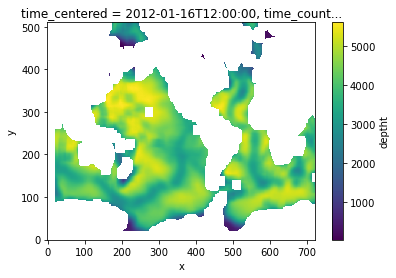

In [52]:
topo.plot()

In [53]:
import numpy as np

In [54]:
topo_lon = topo.diff("x") / topo.nav_lon.diff("x") / 111e3 / np.cos(np.deg2rad(topo.nav_lat))
topo_lon

<xarray.DataArray (y: 511, x: 721)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x              (x) int64 1 2 3 4 5 6 7 8 ... 714 715 716 717 718 719 720 721
  * y              (y) int64 0 1 2 3 4 5 6 7 ... 503 504 505 506 507 508 509 510
    nav_lat        (y, x) float32 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon        (y, x) float32 73.25 73.75 74.25 74.75 ... 73.01 73.0 73.0
    time_centered  datetime64[ns] 2012-01-16T12:00:00
    time_counter   datetime64[ns] 2012-01-16T12:00:00

In [55]:
topo_lat = topo.diff("y") / topo.nav_lat.diff("y") / 111e3
topo_lat

<xarray.DataArray (y: 510, x: 722)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 -76.9 -76.9 -76.9 -76.9 ... 50.07 50.0 50.0
    nav_lon        (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
    time_centered  datetime64[ns] 2012-01-16T12:00:00
    time_counter   datetime64[ns] 2012-01-16T12:00:00
  * x              (x) int64 0 1 2 3 4 5 6 7 ... 714 715 716 717 718 719 720 721
  * y              (y) int64 1 2 3 4 5 6 7 8 ... 503 504 505 506 507 508 509 510

depth field:
$$d(x, y)$$

column vector gradient:
$$grad(d) = (d_x, d_y)^T$$

Projection matrix
$$P = \frac{grad(d) \cdot grad(d)^T}{|grad(d)|^2}$$

Along-gradient (down topo slope) component of wind stress
$$\vec{\tau}_{offshore} = P \cdot \vec{\tau}$$

Along depth isoline:
$$\vec{\tau}_{along} = (1 - P) \cdot \vec{\tau}$$

In [56]:
grad = np.array([[topo_lon, topo_lat], ])
grad.shape

/tmp/ipykernel_335/3380070653.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  grad = np.array([[topo_lon, topo_lat], ])


(1, 2)

In [57]:
grad.T.shape

(2, 1)

In [58]:
np.array(((grad ** 2).sum(), ))

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [59]:
grad_x = topo_lon
grad_y = topo_lat

In [60]:
projector_xx = grad_x ** 2 / (grad_x ** 2 + grad_y ** 2)
projector_yy = grad_y ** 2 / (grad_x ** 2 + grad_y ** 2)
projector_xy = grad_x * grad_y / (grad_x ** 2 + grad_y ** 2)
projector_yx = grad_y * grad_x / (grad_x ** 2 + grad_y ** 2)

In [61]:
tau_x = ds.votemper.isel(deptht=0)
tau_y = ds.vosaline.isel(deptht=0)

In [62]:
tau_down_slope_x = projector_xx * tau_x + projector_xy * tau_y
tau_down_slope_y = projector_yx * tau_x + projector_yy * tau_y

In [63]:
projector = np.matmul(grad.T, grad) # / (grad ** 2).sum()

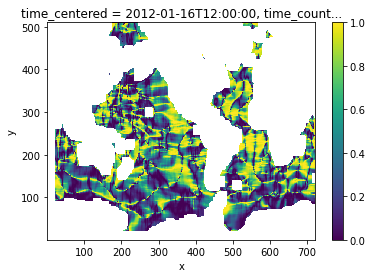

In [65]:
projector_xx.plot()

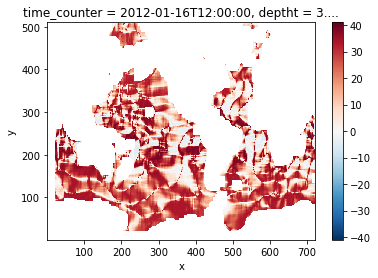

In [67]:
tau_down_slope_y.isel(time_counter=0).isel(x=

In [68]:
tau_along_shore_x = tau_x - tau_down_slope_x
tau_along_shore_y = tau_y - tau_down_slope_y

In [69]:
tau_along_shore = (tau_along_shore_x ** 2 + tau_along_shore_y ** 2) ** 0.5

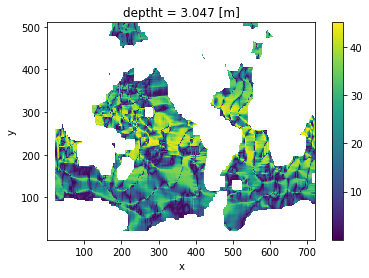

In [70]:
tau_along_shore.mean("time_counter").plot()